# Dicoding - Belajar Machine Learning Untuk Pemula

Nama  : Alfia N. Rakhmatika<br>
Email : alfianurul@gmail.com

**Submission**

Tugas membuat program jaringan saraf tiruan menggunakan TensorFlow yang mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.



## 1. Import libraries

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

## 2. Download dataset

In [2]:
# Download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-06-01 16:37:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.14MB/s    in 4m 0s   

2021-06-01 16:41:04 (1.28 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## 3. Ekstraksi file zip

In [3]:
# Ekstraksi dataset ke folder submission
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/submission/')
zip_ref.close()

# Check isi
os.listdir('/tmp/submission/')

['rockpaperscissors', '__MACOSX']

## 4. Split Data menjadi Train dan Validation

In [4]:
# Deklarasi base directory
base_dir = '/tmp/submission/rockpaperscissors/rps-cv-images'

# Hapus txt file
os.remove('/tmp/submission/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

# Check isi base_dir
os.listdir(base_dir)

['scissors', 'paper', 'rock']

## 5. Object ImageDataGenerator

In [5]:
# Membuat objek ImageDataGenerator untuk data training dengan menambahkan image augmentation dan data validasi (40%) 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.4)

In [6]:
# Deklarasi variables
img_height = 150
img_width = 150
batch_size = 32

# Data Training
train_datas = train_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory=base_dir,
                                                 shuffle=True,
                                                 target_size=(img_height, img_width), 
                                                 subset="training",
                                                 class_mode='categorical')

# Data validation
validation_datas = validation_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory=base_dir,
                                                 shuffle=True,
                                                 target_size=(img_height, img_width), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## 6. Model

In [7]:
# Model Sequential
mymodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [8]:
# Compile model dengan optimizer adam dan loss categorical_crossentropy
mymodel.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
# Deklarasi target akurasi
target = 0.96

# Buat fungsi callback
class MyCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > target and logs.get('val_accuracy') > target):
            print("\nTraining stopped! Model has achieved 96% accuracy!") 
            self.model.stop_training = True 

In [10]:
# Latih model
mymodel.fit(
      train_datas,
      steps_per_epoch = 25,  # Batch yang akan dieksekusi pada setiap epoch
      epochs = 20, # Jumlah eposchs untuk training data sampai mencapai target akurasi
      validation_data = validation_datas, # Menampilkan akurasi pengujian data validasi
      validation_steps = 5,  
      verbose = 2,
      callbacks=[MyCallback()]) # Panggil fungsi callback

Epoch 1/20
25/25 - 37s - loss: 1.1519 - accuracy: 0.3650 - val_loss: 1.0940 - val_accuracy: 0.3313
Epoch 2/20
25/25 - 34s - loss: 0.8605 - accuracy: 0.5909 - val_loss: 0.4200 - val_accuracy: 0.8562
Epoch 3/20
25/25 - 34s - loss: 0.4723 - accuracy: 0.8169 - val_loss: 0.3007 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 34s - loss: 0.2811 - accuracy: 0.9052 - val_loss: 0.2471 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 35s - loss: 0.2461 - accuracy: 0.9200 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 34s - loss: 0.1816 - accuracy: 0.9377 - val_loss: 0.1484 - val_accuracy: 0.9625
Epoch 7/20
25/25 - 35s - loss: 0.1753 - accuracy: 0.9388 - val_loss: 0.1954 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 34s - loss: 0.1828 - accuracy: 0.9286 - val_loss: 0.1229 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 35s - loss: 0.1448 - accuracy: 0.9500 - val_loss: 0.1392 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 34s - loss: 0.1307 - accuracy: 0.9610 - val_loss: 0.2798 - val_accuracy: 0.8875
Epoch 11/

## 7. Check Model

In [11]:
# Create function untuk menerima data image upload
def check_model():
  uploaded = files.upload()
 
  # Iterasi
  for fn in uploaded.keys():
    # prediksi image
    path = fn
    img = image.load_img(path, target_size=(img_height, img_width))
    imgplot = plt.imshow(img) # Menggunakan matplotlib
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # Hasil prediksi model
    images = np.vstack([x])
    classes = mymodel.predict(images, batch_size=10)
    ind = np.argmax(classes) # ambil index data max dari list 3 element

  # Conditional
  if ind==0:
    result = 'Paper'
  elif ind==1:
    result = 'Rock'
  elif ind==2:
    result = 'Scissors'

  return result

Saving hand.jpg to hand.jpg
Klasifikasi = Paper


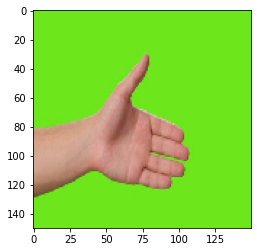

In [12]:
# Panggil fungsi
hasil = check_model()
print('Klasifikasi =', hasil)

Saving gunting.jpg to gunting.jpg
Klasifikasi = Scissors


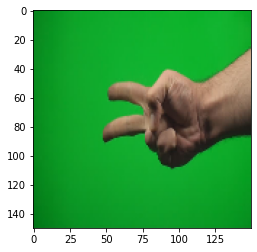

In [13]:
# Panggil fungsi
hasil = check_model()
print('Klasifikasi =', hasil)

Saving fist.jpg to fist.jpg
Klasifikasi = Rock


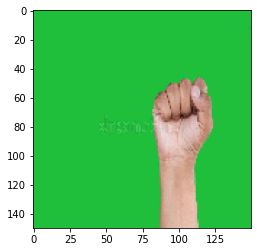

In [14]:
# Panggil fungsi
hasil = check_model()
print('Klasifikasi =', hasil)

END